In [17]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import matplotlib.pyplot as plt

In [18]:
torch.cuda.is_available()

True

In [19]:
batch_size = 200

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_data =  torchvision.datasets.MNIST(root='./dataset', train=True, download=True, transform=transform)
test_data =  torchvision.datasets.MNIST(root='./dataset', train=False, download=True, transform=transform)

In [20]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=10)
test_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=10)

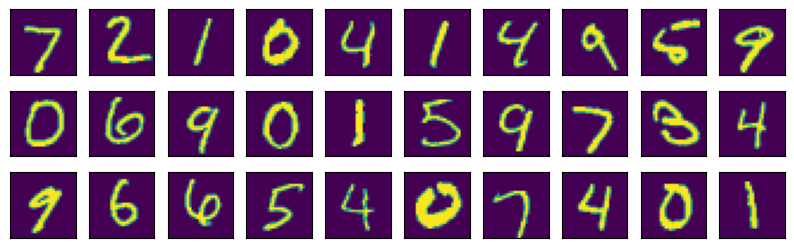

In [21]:
sampleset = torchvision.datasets.MNIST(root='./dataset', train=False, download=True)
fig = plt.figure(figsize=(10, 3))
for i in range(30):
  ax = fig.add_subplot(3, 10, i+1, xticks=[], yticks=[])
  (img, lbl) = sampleset.__getitem__(i)
  ax.imshow(img)

In [22]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [23]:
class Net(nn.Module):
	def __init__(self):
		super().__init__()
		self.model = nn.Sequential(
			nn.Conv2d(1, 20, 3, padding=1),
			nn.ReLU(),
			nn.MaxPool2d(2, 2),
			nn.Conv2d(20, 20, 3, padding=1),
			nn.Flatten(),
			nn.Linear(20 * 14 * 14, 10)
		)
    
	def forward(self, x):
		return self.model(x)
      
model = Net().to(device)
print(model)

Net(
  (model): Sequential(
    (0): Conv2d(1, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): Flatten(start_dim=1, end_dim=-1)
    (5): Linear(in_features=3920, out_features=10, bias=True)
  )
)


Epoch [1/25], Loss: 0.1216, Accuracy: 0.9627
Epoch [2/25], Loss: 0.0792, Accuracy: 0.9766
Epoch [3/25], Loss: 0.0630, Accuracy: 0.9813
Epoch [4/25], Loss: 0.0610, Accuracy: 0.9811
Epoch [5/25], Loss: 0.0494, Accuracy: 0.9850
Epoch [6/25], Loss: 0.0476, Accuracy: 0.9849
Epoch [7/25], Loss: 0.0437, Accuracy: 0.9861
Epoch [8/25], Loss: 0.0377, Accuracy: 0.9886
Epoch [9/25], Loss: 0.0374, Accuracy: 0.9883
Epoch [10/25], Loss: 0.0357, Accuracy: 0.9889
Epoch [11/25], Loss: 0.0368, Accuracy: 0.9884
Epoch [12/25], Loss: 0.0337, Accuracy: 0.9890
Epoch [13/25], Loss: 0.0288, Accuracy: 0.9910
Epoch [14/25], Loss: 0.0263, Accuracy: 0.9919
Epoch [15/25], Loss: 0.0302, Accuracy: 0.9901
Epoch [16/25], Loss: 0.0230, Accuracy: 0.9930
Epoch [17/25], Loss: 0.0256, Accuracy: 0.9918
Epoch [18/25], Loss: 0.0230, Accuracy: 0.9926
Epoch [19/25], Loss: 0.0205, Accuracy: 0.9935
Epoch [20/25], Loss: 0.0232, Accuracy: 0.9923
Epoch [21/25], Loss: 0.0161, Accuracy: 0.9951
Epoch [22/25], Loss: 0.0168, Accuracy: 0.99

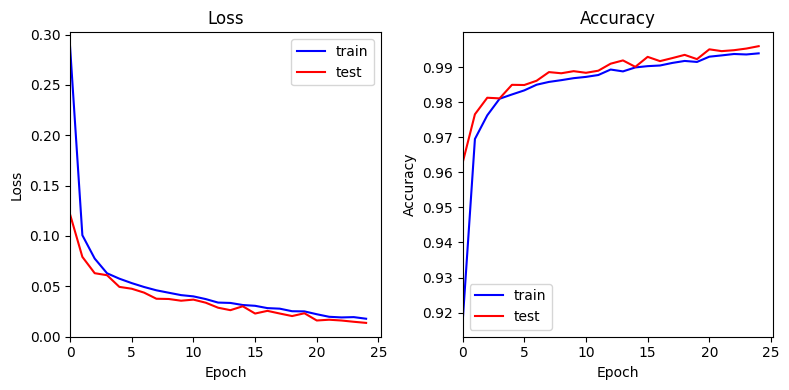

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 25

plt_epoch = []
plt_epoch_loss = []
plt_epoch_accuracy = []
epoch_loss = 0
accuracy = 0
epoch_loss_val = 0
accuracy_val = 0
plt_epoch_val = []
plt_epoch_loss_val = []
plt_epoch_accuracy_val = []


for epoch in range(num_epochs):
	epoch_loss = 0
	epoch_loss_val = 0
	correct = 0
	correct_val = 0
	total = 0
	total_val = 0
	total0 = 0
	total0_val = 0
	
	for i, (images, labels) in enumerate(train_loader):
		images = images.to(device)
		labels = labels.to(device)
		optimizer.zero_grad() # 勾配初期化
		output = model(images)
		loss = criterion(output, labels) # 損失を計算
		loss.backward() # 逆伝播
		optimizer.step() # パラメータ更新
		total += labels.size(0)
		total0 += 1
		epoch_loss += loss.item()
		_, predicted = torch.max(output, 1)
		correct += (predicted == labels).sum().item()
	
	epoch_loss /= total0 # バッチサイズで割る
	accuracy = correct / total
	plt_epoch.append(epoch)
	plt_epoch_loss.append(epoch_loss)
	plt_epoch_accuracy.append(accuracy)
	# print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.4f}')

	for i, (images, labels) in enumerate(test_loader):
		with torch.no_grad():
			images = images.to(device)
			labels = labels.to(device)
			output = model(images)
			total_val += labels.size(0) # バッチサイズ分を足す
			_, predicted = torch.max(output, 1)
			total0_val += 1
			correct_val += (predicted == labels).sum().item()
			loss = criterion(output, labels)
			epoch_loss_val += loss.item()
	epoch_loss_val /= total0_val
	accuracy_val = correct_val / total_val
	plt_epoch_val.append(epoch)
	plt_epoch_loss_val.append(epoch_loss_val)
	plt_epoch_accuracy_val.append(accuracy_val)
	
	print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss_val:.4f}, Accuracy: {accuracy_val:.4f}')

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].plot(plt_epoch, plt_epoch_loss, label='train', color='blue')
ax[0].plot(plt_epoch_val, plt_epoch_loss_val, label='test', color='red')
ax[0].set_title('Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[0].set_xlim(left=0)

ax[1].plot(plt_epoch, plt_epoch_accuracy, label='train', color='blue')
ax[1].plot(plt_epoch_val, plt_epoch_accuracy_val, label='test', color='red')
ax[1].set_title('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
ax[1].set_xlim(left=0)

plt.tight_layout()
plt.show()